In [93]:
#!pip install contextily

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')
import contextily as ctx

In [95]:
#Import dataset (processed)
landsat_7 = pd.read_csv('landsat7_df.csv')
landsat_8 = pd.read_csv('landsat8_df.csv')
merged_data = pd.read_csv('merged_data.csv')
salinity = pd.read_csv('salinity_df.csv')
station = pd.read_csv('station_with_id.csv')

# Salinity analysis

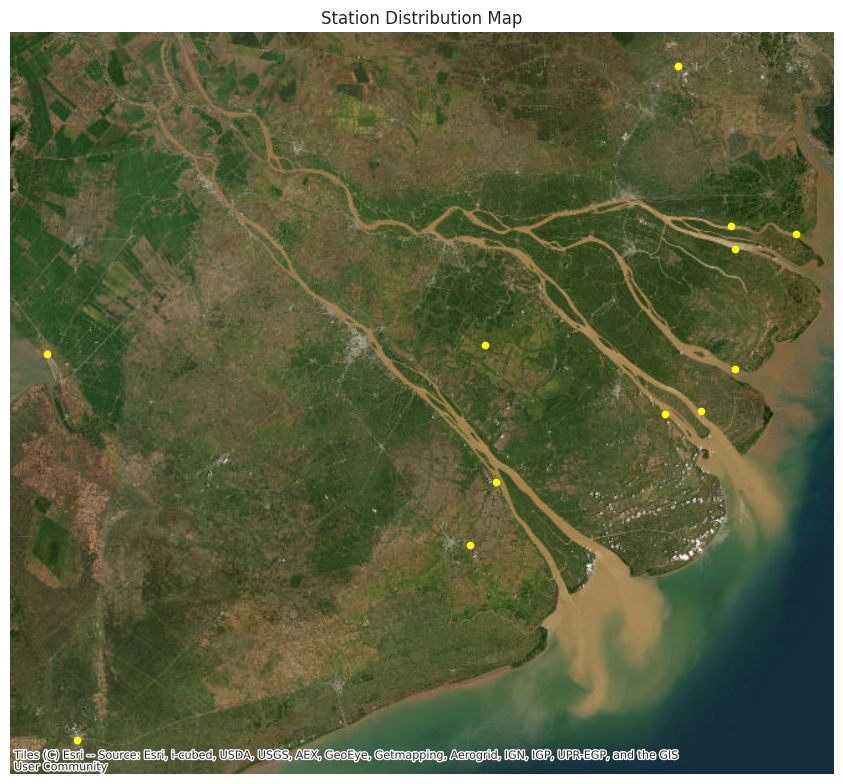

In [96]:
# Convert to GeoDataFrame (WGS84)
gdf = gpd.GeoDataFrame(station, geometry=gpd.points_from_xy(station['Longitude'], station['Latitude']), crs="EPSG:4326")

# Reproject to Web Mercator for contextily
gdf = gdf.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='yellow', markersize=20)

# Add station labels
#for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['id']):
#    ax.text(x + 5000, y + 5000, label, fontsize=12)

# ✅ Add Satellite Basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

# Format
ax.set_axis_off()
plt.title("Station Distribution Map")
plt.tight_layout()
plt.savefig("station_map_basemap.png", dpi=300)
plt.show()

In [97]:
merged_salinity = pd.merge(salinity, station, on='Station')
merged_salinity

Station        date     1     3     5    7    9   11   13  \
0        An_Thuan_Ben_Tre  2014-03-01  11.7  15.5   8.2  4.8  3.2  1.1  0.8   
1        An_Thuan_Ben_Tre  2014-04-01   5.8  10.6  14.2  4.9  2.4  1.2  0.6   
2        An_Thuan_Ben_Tre  2014-05-01   1.9   5.8   7.2  8.1  3.5  1.7  0.5   
3        An_Thuan_Ben_Tre  2014-06-01   2.3   3.2   6.1  7.9  4.2  1.9  0.4   
4        An_Thuan_Ben_Tre  2014-09-01   4.2   2.5   1.9  2.2  3.4  3.9  3.5   
...                   ...         ...   ...   ...   ...  ...  ...  ...  ...   
6706  Vam_Kenh_Tien_Giang  2018-06-22   4.0   1.9   0.6  3.1  6.8  8.8  8.2   
6707  Vam_Kenh_Tien_Giang  2018-06-23   5.4   3.1   1.5  4.1  7.5  6.7  6.0   
6708  Vam_Kenh_Tien_Giang  2018-06-24   6.6   4.7   2.0  4.1  6.2  8.0  6.5   
6709  Vam_Kenh_Tien_Giang  2018-06-29   4.1   6.1   8.0  6.6  4.9  3.8  6.5   
6710  Vam_Kenh_Tien_Giang  2018-06-30   3.2   6.7   7.8  7.0  6.5  3.9  6.4   

       15  ...    19   21    23  min   max      mean    median   Latitude  \
0     1.8  ...   6.3  4.6   2.2  0.8  15.5  6.021429  4.800000   9.980203   
1     2.3  ...   9.7  7.2   2.9  0.6  14.2  5.807143  4.900000   9.980203   
2     2.6  ...  10.0  6.5   3.8  0.5  10.0  4.842857  4.842857   9.980203   
3     1.7  ...   7.7  5.1   3.8  0.4   7.9  3.992857  3.800000   9.980203   
4     3.0  ...   4.2  9.5  10.6  1.9  10.6  4.650000  3.700000   9.980203   
...   ...  ...   ...  ...   ...  ...   ...       ...       ...        ...   
6706  7.1  ...   1.4  4.8   6.0  0.6   8.8  4.650000  4.650000  10.274361   
6707  6.9  ...   0.4  3.2   6.1  0.4   7.5  4.371429  4.371429  10.274361   
6708  8.1  ...   3.1  0.2   4.1  0.2   8.1  4.878571  4.878571  10.274361   
6709  7.5  ...   4.4  2.8   0.0  0.0   8.0  4.892857  4.900000  10.274361   
6710  7.0  ...   5.0  3.0   0.0  0.0   7.8  5.071429  6.400000  10.274361   

       Longitude  id  
0     106.601953   1  
1     106.601953   1  
2     106.601953   1  
3     106.601953   1  
4     106.601953   1  
...          ...  ..  
6706  106.737150  12  
6707  106.737150  12  
6708  106.737150  12  
6709  106.737150  12  
6710  106.737150  12  

[6711 rows x 21 columns]

In [98]:
station_stats = merged_salinity.groupby(['id', 'Latitude', 'Longitude'])['mean'].agg(['mean', 'count']).reset_index()
station_stats.columns = ['id', 'Latitude', 'Longitude', 'Mean_Salinity', 'Observation_Count']

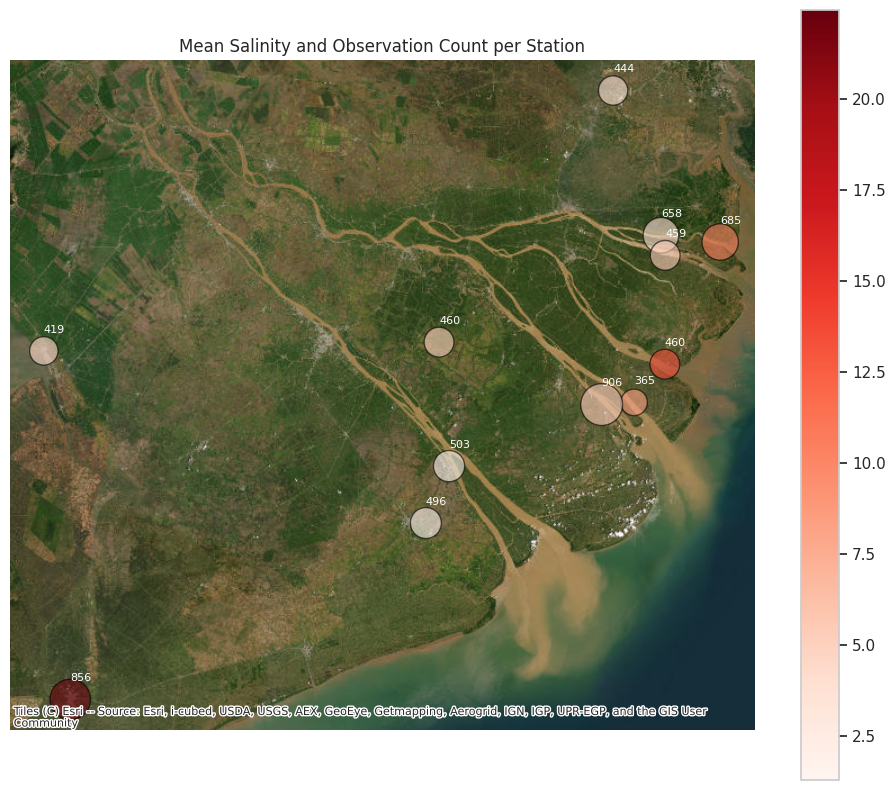

In [99]:
gdf = gpd.GeoDataFrame(
    station_stats,
    geometry=gpd.points_from_xy(station_stats['Longitude'], station_stats['Latitude']),
    crs="EPSG:4326"
).to_crs(epsg=3857)

# Step 3: Plot
fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(
    ax=ax,
    column='Mean_Salinity',
    cmap='Reds',
    markersize=gdf['Observation_Count'],  # adjust if too small/large
    legend=True,
    alpha=0.6,
    edgecolor='black'
)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

# Add station labels
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Observation_Count']):
    ax.text(x, y + 5000, label, fontsize=8, color='white')

ax.set_title('Mean Salinity and Observation Count per Station')
ax.axis('off')
plt.show()

In [100]:
merged_salinity['date'] = pd.to_datetime(merged_salinity['date'])
merged_salinity['Year'] = merged_salinity['date'].dt.year

In [101]:
trend = merged_salinity.groupby(['Station', 'Year'])['mean'].mean().reset_index()

In [102]:
# Create 'YearMonth' column
merged_salinity['YearMonth'] = merged_salinity['date'].dt.to_period('M').astype(str)

In [103]:
monthly_trend = merged_salinity.groupby(['Station', 'YearMonth'])['mean'].mean().reset_index()

In [104]:
# station_labels = {
#     'An_Thuan_Ben_Tre': 'An Thuan (Ben Tre)',
#     'Ben_Luc_Long_An': 'Ben Luc (Long An)',
#     'Ben_Trai_Ben_Tre': 'Ben Trai (Ben Tre)',
#     'Ca_Mau_Ca_Mau': 'Ca Mau (Ca Mau)',
#     'Dai_Ngai_Soc_Trang': 'Dai Ngai (Soc Trang)',
#     'Hoa_Binh_Tien_Giang': 'Hoa Binh (Tien Giang)',
#     'Hung_My_Tra_Vinh': 'Hung My (Tra Vinh)',
#     'Loc_Thuan_Ben_Tre': 'Loc Thuan (Ben Tre)',
#     'Rach_Gia_Kien_Giang': 'Rach Gia (Kien Giang)',
#     'Soc_Doc_Ben_Tre': 'Soc Doc (Ben Tre)',
#     'Soc_Trang_Soc_Trang': 'Soc Trang (Soc Trang)',
#     'Vam_Kenh_Tien_Giang': 'Vam Kenh (Tien Giang)'
#     }

monthly_trend['Station'] = monthly_trend['Station']

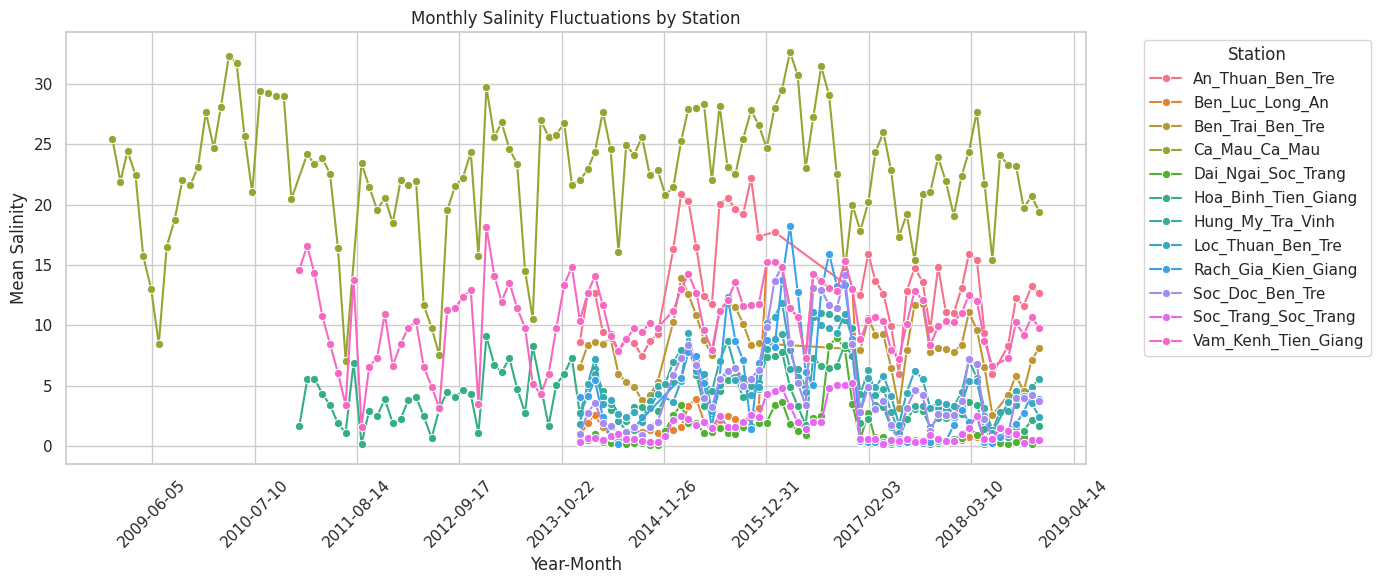

In [105]:
monthly_trend['YearMonth'] = pd.to_datetime(monthly_trend['YearMonth'])

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trend, x='YearMonth', y='mean', hue='Station', marker='o')

plt.title('Monthly Salinity Fluctuations by Station')
plt.ylabel('Mean Salinity')
plt.xlabel('Year-Month')

# Auto format x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=12))  # ~12 evenly spaced ticks
plt.xticks(rotation=45)

plt.grid(True)
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [106]:
merged_salinity['Month'] = merged_salinity['date'].dt.month

In [107]:
# Step 2: Group by Station, Year, and Month
monthly_pattern = merged_salinity.groupby(['Station', 'Year', 'Month'])['mean'].mean().reset_index()

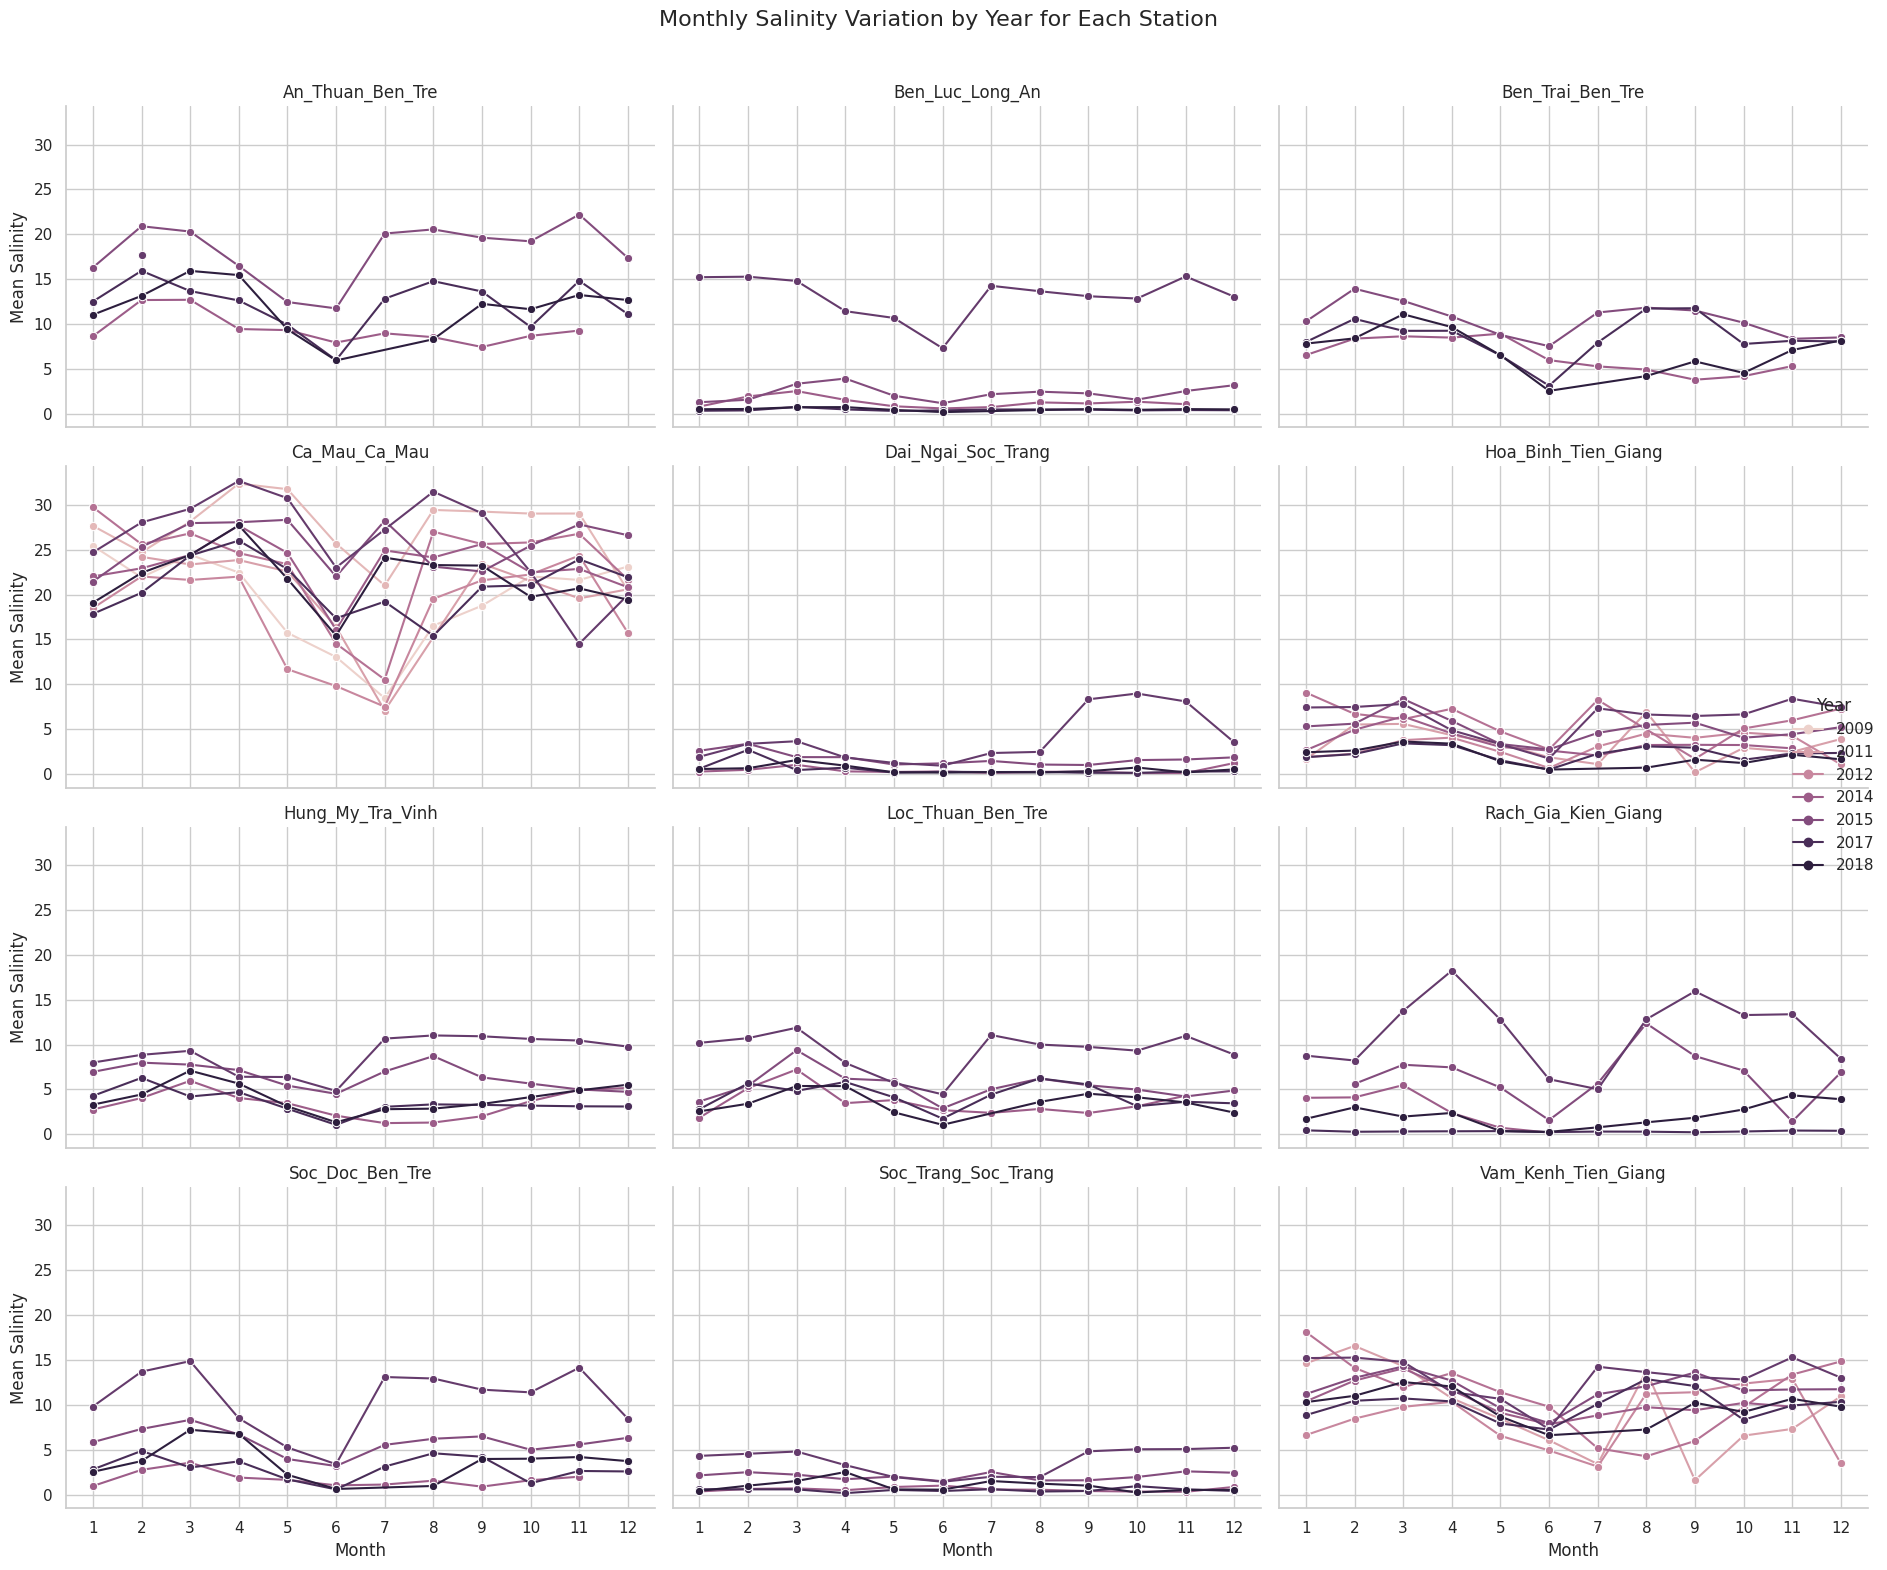

In [108]:
g = sns.relplot(
    data=monthly_pattern,
    x='Month', y='mean',
    hue='Year', kind='line',
    col='Station', col_wrap=3,
    height=4, aspect=1.5,
    marker='o'
)

g.set_titles('{col_name}')
g.set_axis_labels('Month', 'Mean Salinity')
g.set(xticks=range(1, 13))
g.fig.suptitle('Monthly Salinity Variation by Year for Each Station', fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.92)

In [109]:
monthly_avg = merged_salinity.groupby('Month')['median'].mean().reset_index()

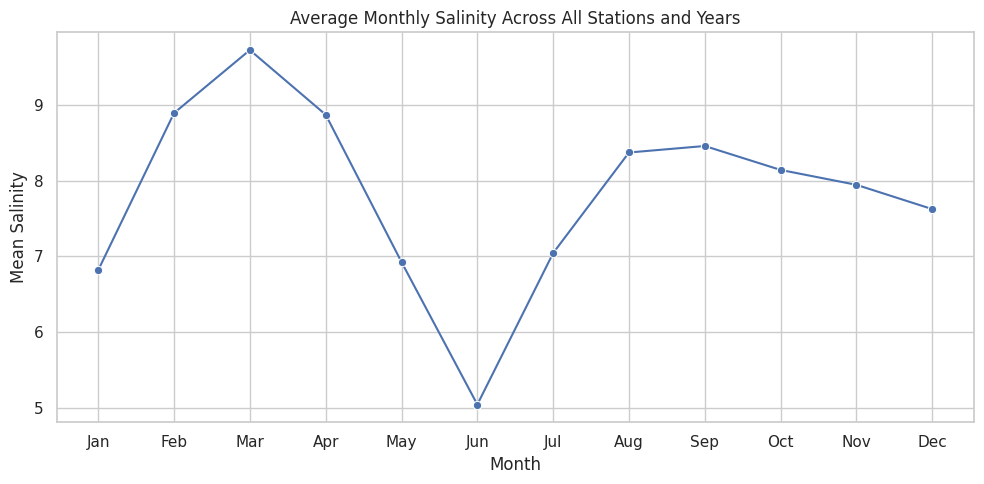

In [110]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x='Month', y='median', marker='o')

plt.title('Average Monthly Salinity Across All Stations and Years')
plt.xlabel('Month')
plt.ylabel('Mean Salinity')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='Month', ylabel='Station'>

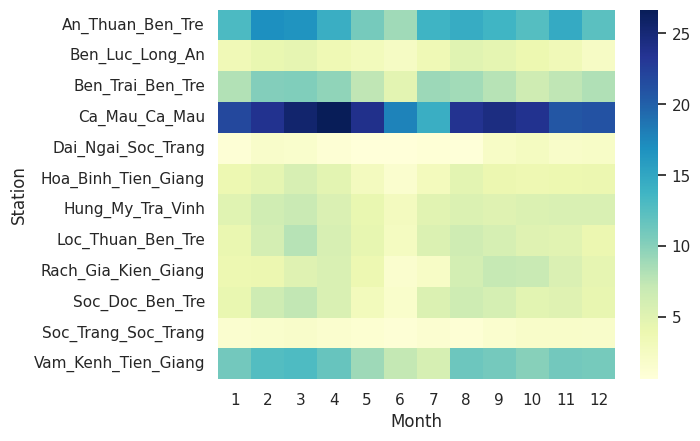

In [111]:
pivot = merged_salinity.pivot_table(index='Station', columns='Month', values='mean', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu')

<Axes: xlabel='Year', ylabel='Station'>

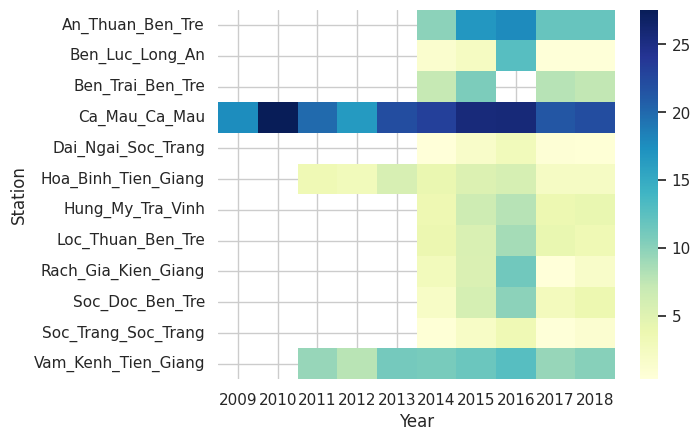

In [112]:
pivot = merged_salinity.pivot_table(index='Station', columns='Year', values='mean', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu')

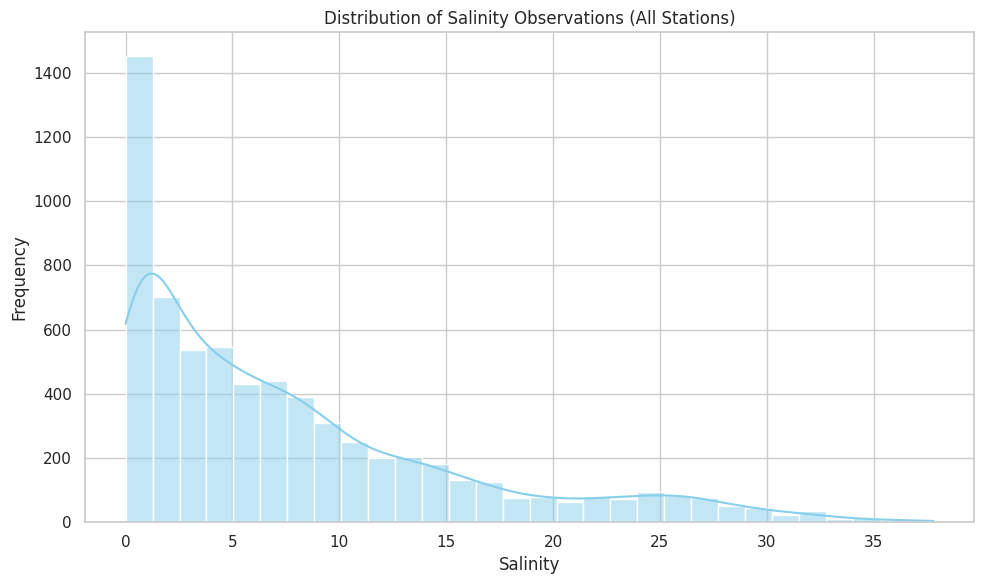

In [113]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_salinity, x='mean', bins=30, kde=True, color='skyblue')

plt.title('Distribution of Salinity Observations (All Stations)')
plt.xlabel('Salinity')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

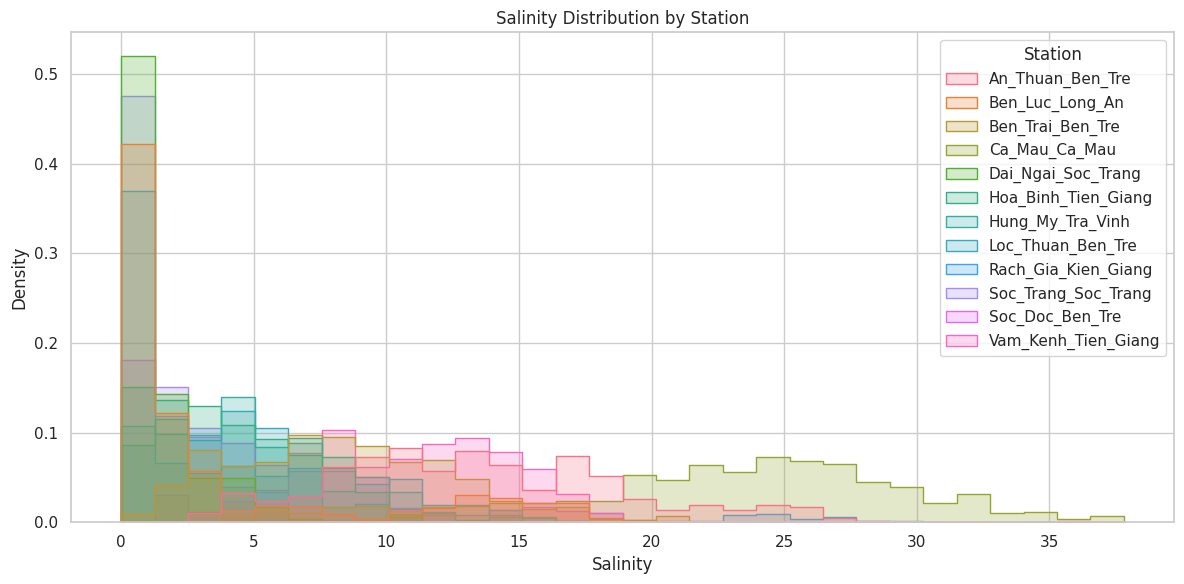

In [114]:
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_salinity, x='mean', hue='Station', element='step', stat='density', common_norm=False, bins=30)

plt.title('Salinity Distribution by Station')
plt.xlabel('Salinity')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

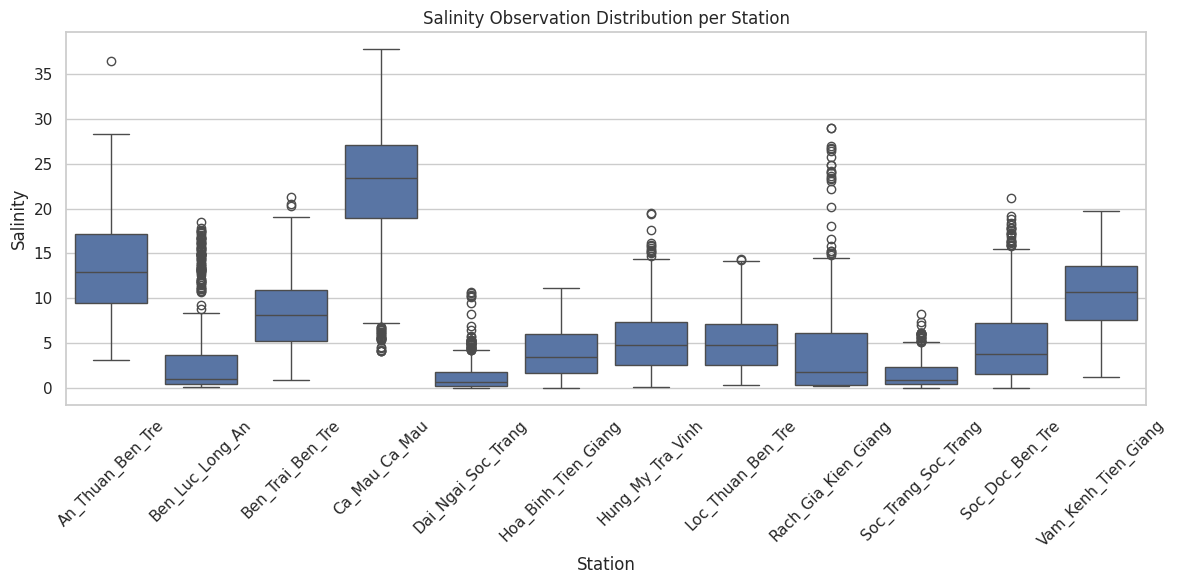

In [115]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_salinity, x='Station', y='mean')
plt.xticks(rotation=45)
plt.title('Salinity Observation Distribution per Station')
plt.ylabel('Salinity')
plt.tight_layout()
plt.show()

# Satellite data analysis

## Landsat 7

In [116]:
landsat_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AWEInsh    134 non-null    float64
 1   AWEIsh     134 non-null    float64
 2   MNDWI      134 non-null    float64
 3   NDWI       134 non-null    float64
 4   SR_B1      134 non-null    float64
 5   SR_B2      134 non-null    float64
 6   SR_B3      134 non-null    float64
 7   SR_B4      134 non-null    float64
 8   SR_B5      134 non-null    float64
 9   SR_B7      134 non-null    float64
 10  ST_B6      134 non-null    float64
 11  WI1        134 non-null    float64
 12  WI2        134 non-null    float64
 13  date       134 non-null    object 
 14  pivot      134 non-null    int64  
 15  reducer    134 non-null    object 
 16  source     134 non-null    object 
 17  Station    134 non-null    object 
 18  Latitude   134 non-null    float64
 19  Longitude  134 non-null    float64
 20  1         

In [117]:
# Create two separate DataFrames
landsat7_mean = landsat_7[landsat_7['reducer'] == 'mean'].copy()
landsat7_median = landsat_7[landsat_7['reducer'] == 'median'].copy()

In [118]:
landsat7_mean['date'] = pd.to_datetime(landsat7_mean['date'])

In [119]:
landsat7_mean['year'] = landsat7_mean['date'].dt.year
landsat7_mean['month'] = landsat7_mean['date'].dt.month
landsat7_mean['dayofyear'] = landsat7_mean['date'].dt.dayofyear

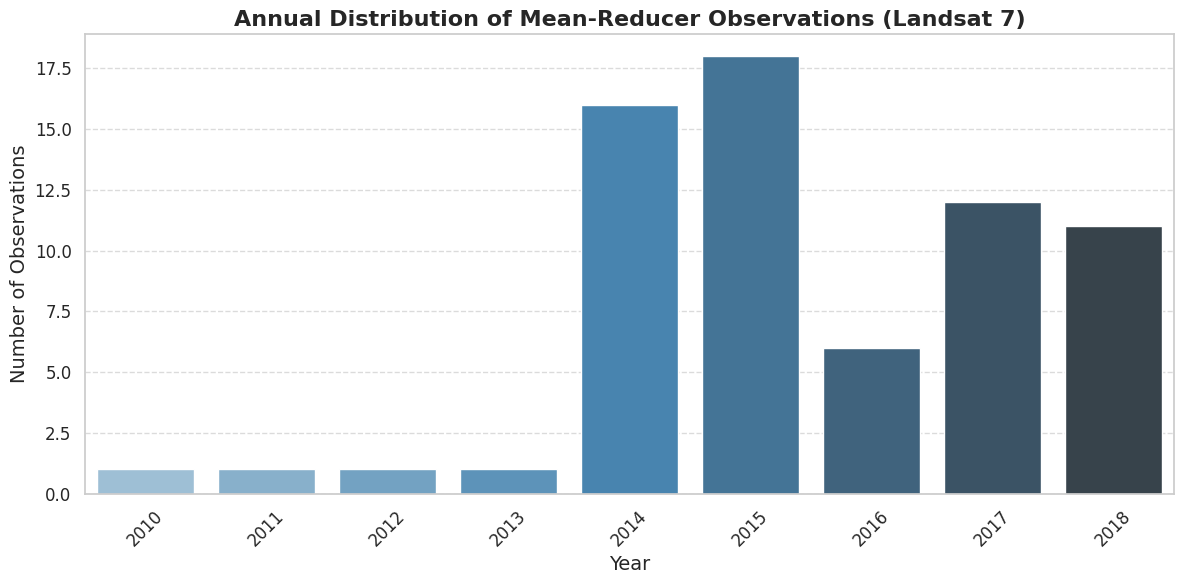

In [120]:
# Set a clean style
sns.set(style='whitegrid')

# Create the figure and axis
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=landsat7_mean, x='year', palette='Blues_d')

# Titles and labels
ax.set_title("Annual Distribution of Mean-Reducer Observations (Landsat 7)", fontsize=16, fontweight='bold')
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Number of Observations", fontsize=14)

# Customize ticks
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)

# Add grid
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Tight layout for spacing
plt.tight_layout()
plt.show()

In [121]:
# Select only numeric columns for correlation
mean_corr = landsat7_mean.select_dtypes(include='float64').corr()
median_corr = landsat7_median.select_dtypes(include='float64').corr()

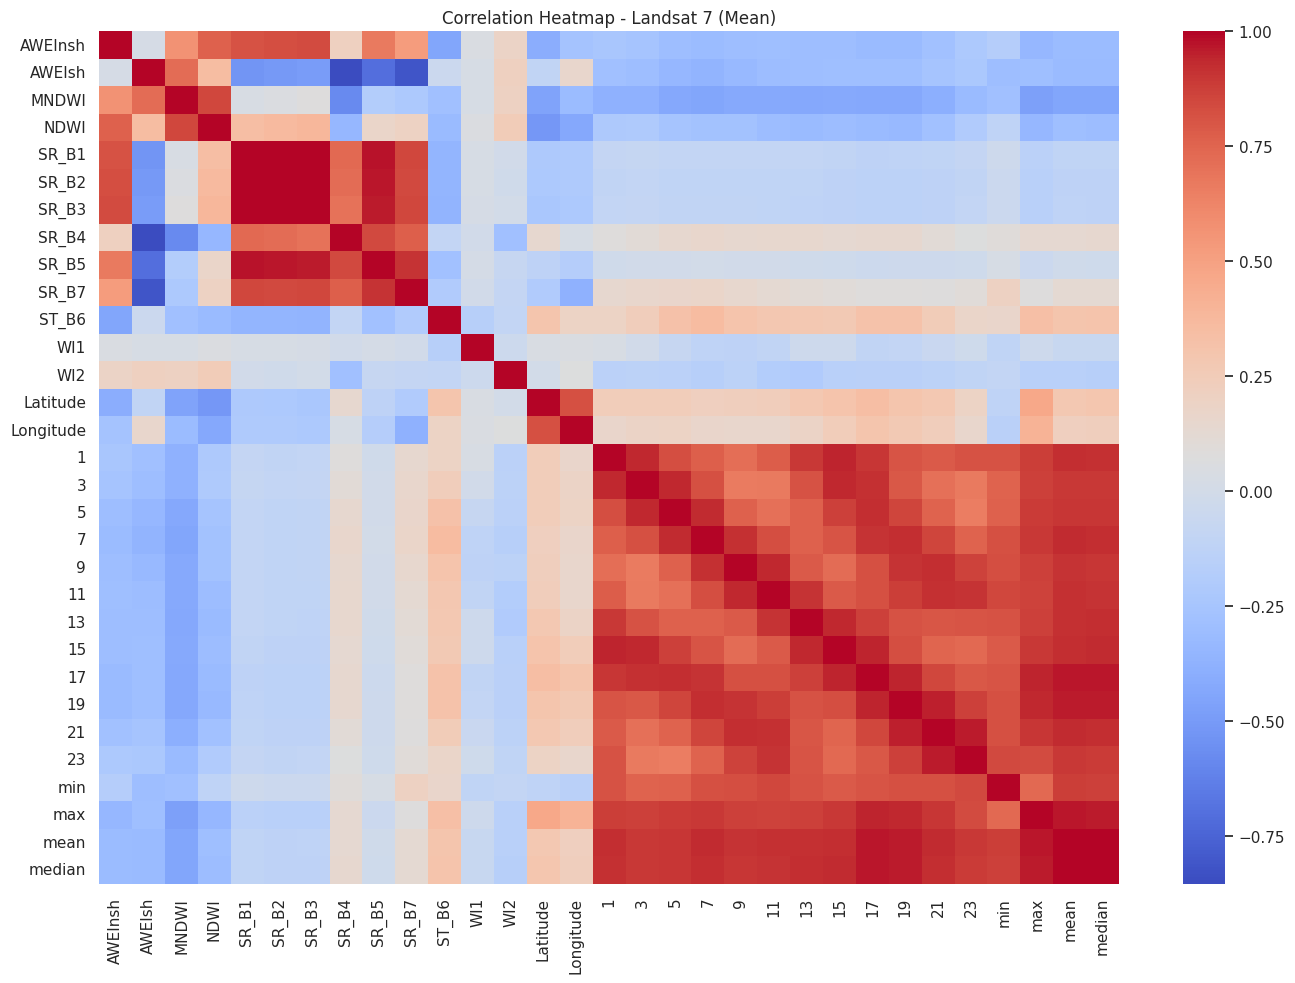

In [122]:
# Plot correlation heatmap for MEAN
plt.figure(figsize=(14, 10))
sns.heatmap(mean_corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap - Landsat 7 (Mean)')
plt.tight_layout()
plt.show()

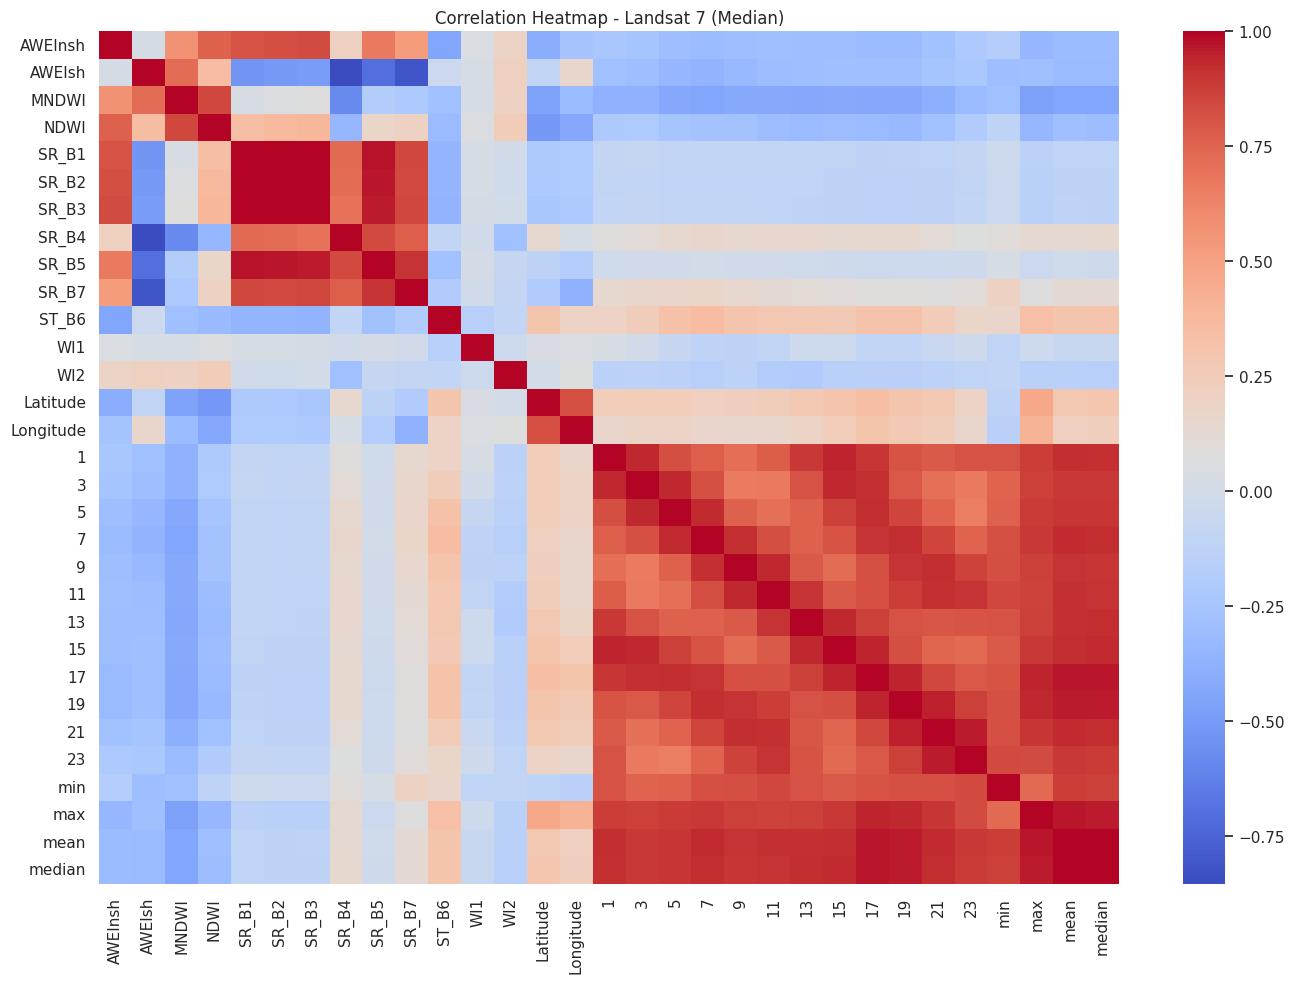

In [123]:
# Plot correlation heatmap for MEDIAN
plt.figure(figsize=(14, 10))
sns.heatmap(median_corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap - Landsat 7 (Median)')
plt.tight_layout()
plt.show()

## Landsat 8

In [124]:
landsat_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AWEInsh    380 non-null    float64
 1   AWEIsh     380 non-null    float64
 2   MNDWI      380 non-null    float64
 3   NDWI       380 non-null    float64
 4   SR_B1      380 non-null    float64
 5   SR_B2      380 non-null    float64
 6   SR_B3      380 non-null    float64
 7   SR_B4      380 non-null    float64
 8   SR_B5      380 non-null    float64
 9   SR_B6      380 non-null    float64
 10  SR_B7      380 non-null    float64
 11  ST_B10     380 non-null    float64
 12  WI1        380 non-null    float64
 13  WI2        380 non-null    float64
 14  date       380 non-null    object 
 15  pivot      380 non-null    int64  
 16  reducer    380 non-null    object 
 17  source     380 non-null    object 
 18  Station    380 non-null    object 
 19  Latitude   380 non-null    float64
 20  Longitude 

In [125]:
# Create two separate DataFrames
landsat8_mean = landsat_8[landsat_8['reducer'] == 'mean'].copy()
landsat8_median = landsat_8[landsat_8['reducer'] == 'median'].copy()

In [126]:
landsat8_mean['date'] = pd.to_datetime(landsat8_mean['date'])

In [127]:
landsat8_mean['year'] = landsat8_mean['date'].dt.year
landsat8_mean['month'] = landsat8_mean['date'].dt.month
landsat8_mean['dayofyear'] = landsat8_mean['date'].dt.dayofyear

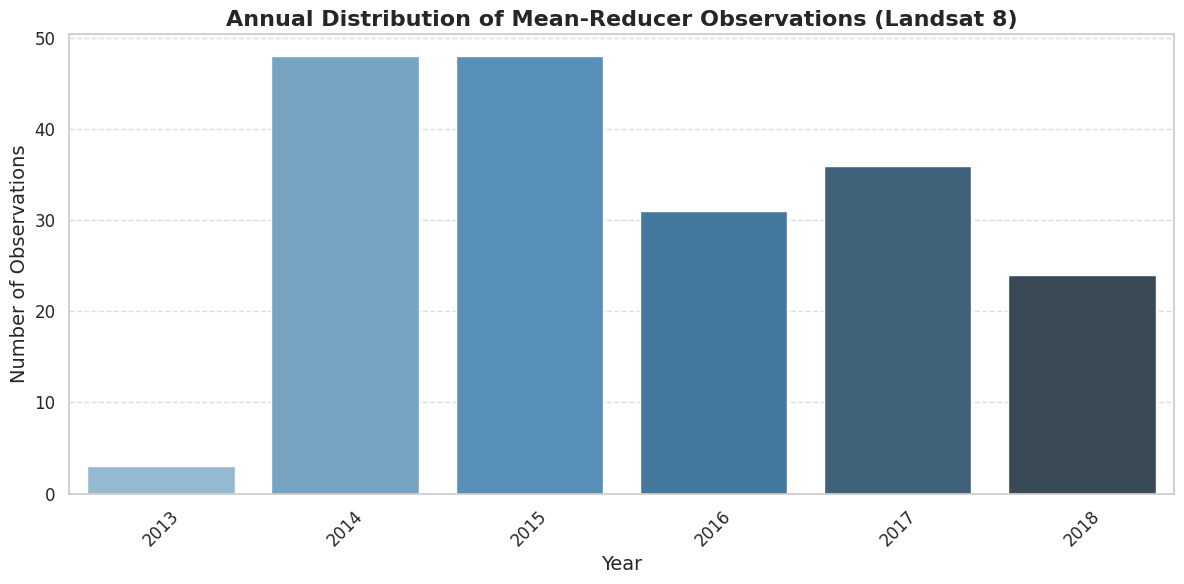

In [128]:
# Set a clean style
sns.set(style='whitegrid')

# Create the figure and axis
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=landsat8_mean, x='year', palette='Blues_d')

# Titles and labels
ax.set_title("Annual Distribution of Mean-Reducer Observations (Landsat 8)", fontsize=16, fontweight='bold')
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Number of Observations", fontsize=14)

# Customize ticks
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)

# Add grid
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Tight layout for spacing
plt.tight_layout()
plt.show()

In [129]:
# Select only numeric columns for correlation
mean_corr_8 = landsat8_mean.select_dtypes(include='float64').corr()
median_corr_8 = landsat8_median.select_dtypes(include='float64').corr()

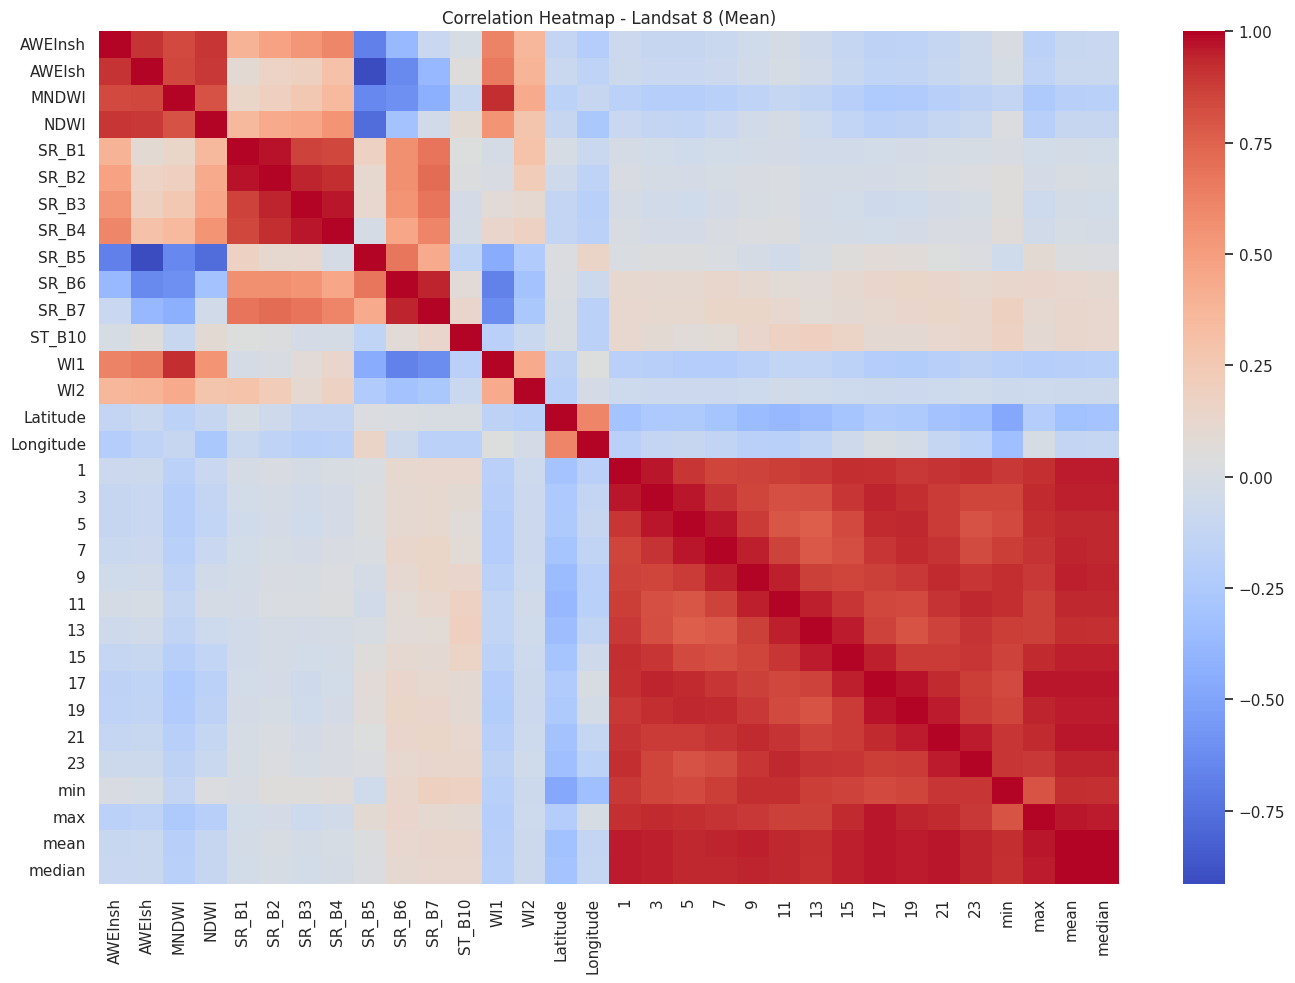

In [130]:
# Plot correlation heatmap for MEAN
plt.figure(figsize=(14, 10))
sns.heatmap(mean_corr_8 , cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap - Landsat 8 (Mean)')
plt.tight_layout()
plt.show()

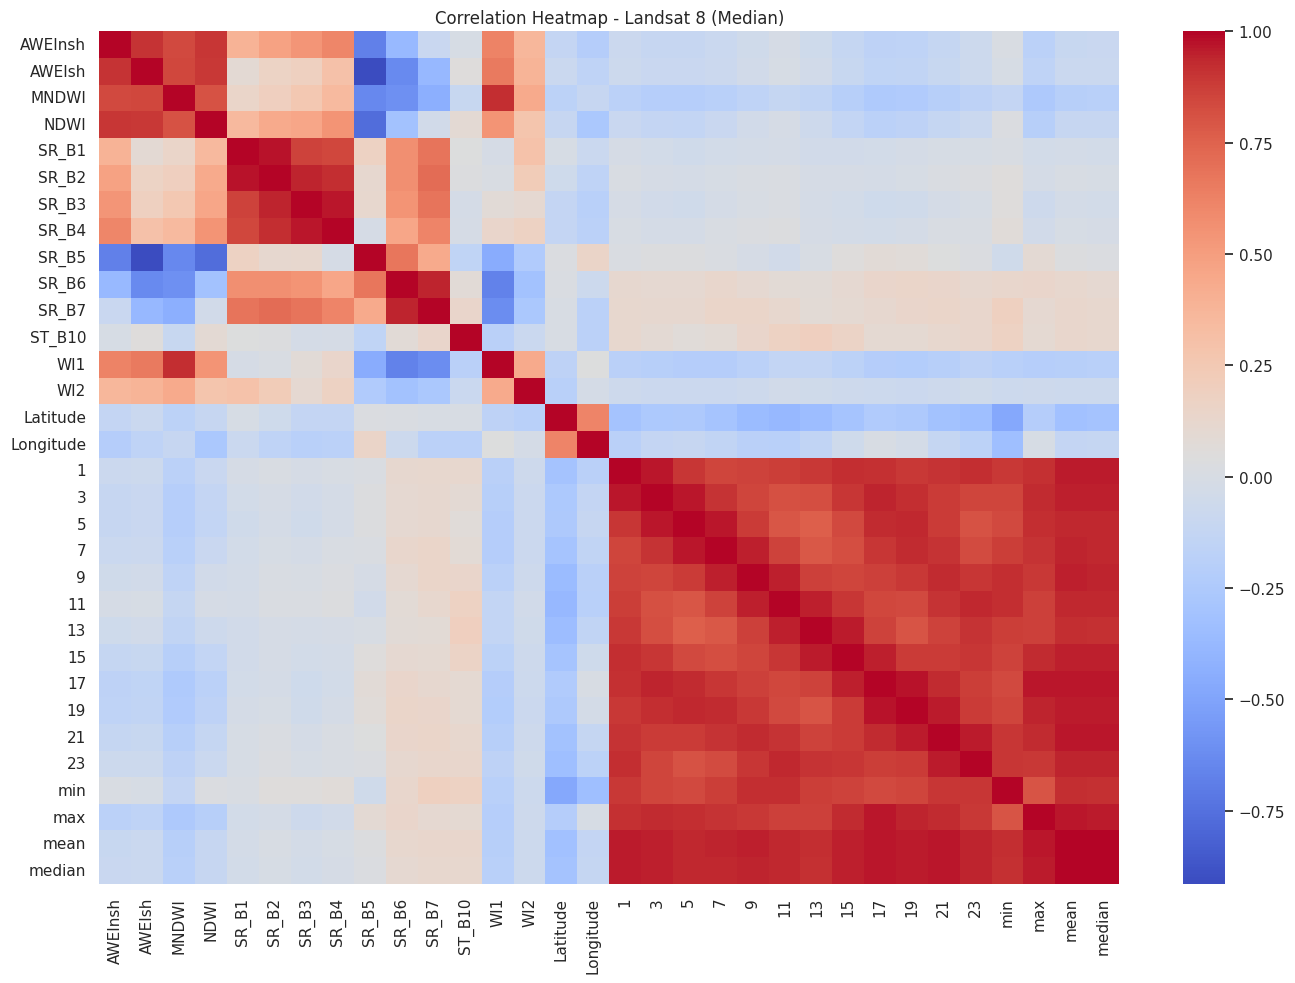

In [131]:
# Plot correlation heatmap for MEDIAN
plt.figure(figsize=(14, 10))
sns.heatmap(median_corr_8, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap - Landsat 8 (Median)')
plt.tight_layout()
plt.show()

## Merge data of Landsat 7 & 8

In [132]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AWEInsh    516 non-null    float64
 1   AWEIsh     516 non-null    float64
 2   MNDWI      516 non-null    float64
 3   NDWI       516 non-null    float64
 4   SR_B1      516 non-null    float64
 5   SR_B2      516 non-null    float64
 6   SR_B3      516 non-null    float64
 7   SR_B4      516 non-null    float64
 8   SR_B5      516 non-null    float64
 9   SR_B7      516 non-null    float64
 10  ST_B6      136 non-null    float64
 11  WI1        516 non-null    float64
 12  WI2        516 non-null    float64
 13  date       516 non-null    object 
 14  pivot      516 non-null    int64  
 15  reducer    516 non-null    object 
 16  source     516 non-null    object 
 17  SR_B6      380 non-null    float64
 18  ST_B10     380 non-null    float64
 19  Station    516 non-null    object 
 20  Latitude  

In [133]:
# Create two separate DataFrames
merge_mean = merged_data[merged_data['reducer'] == 'mean'].copy()
merge_median = merged_data[merged_data['reducer'] == 'median'].copy()

In [134]:
merge_mean['date'] = pd.to_datetime(merge_mean['date'])

In [135]:
merge_mean['year'] = merge_mean['date'].dt.year
merge_mean['month'] = merge_mean['date'].dt.month
merge_mean['dayofyear'] = merge_mean['date'].dt.dayofyear

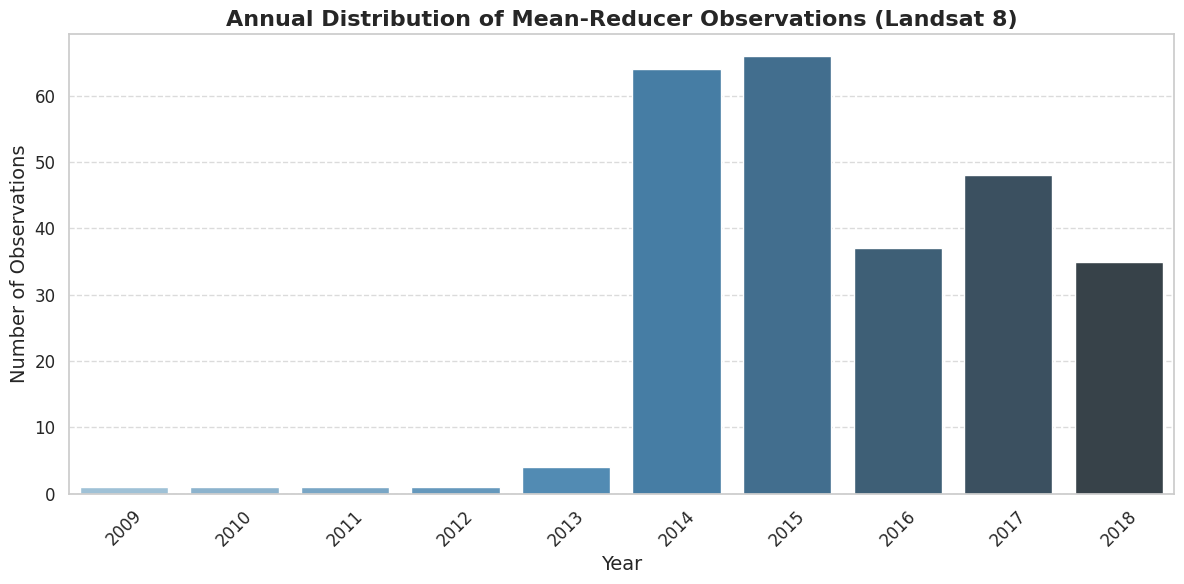

In [136]:
# Set a clean style
sns.set(style='whitegrid')

# Create the figure and axis
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=merge_mean, x='year', palette='Blues_d')

# Titles and labels
ax.set_title("Annual Distribution of Mean-Reducer Observations (Landsat 8)", fontsize=16, fontweight='bold')
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Number of Observations", fontsize=14)

# Customize ticks
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)

# Add grid
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Tight layout for spacing
plt.tight_layout()
plt.show()

In [137]:
# Select only numeric columns for correlation
merge_mean_corr = merge_mean.select_dtypes(include='float64').corr()
merge_median_corr = merge_mean.select_dtypes(include='float64').corr()

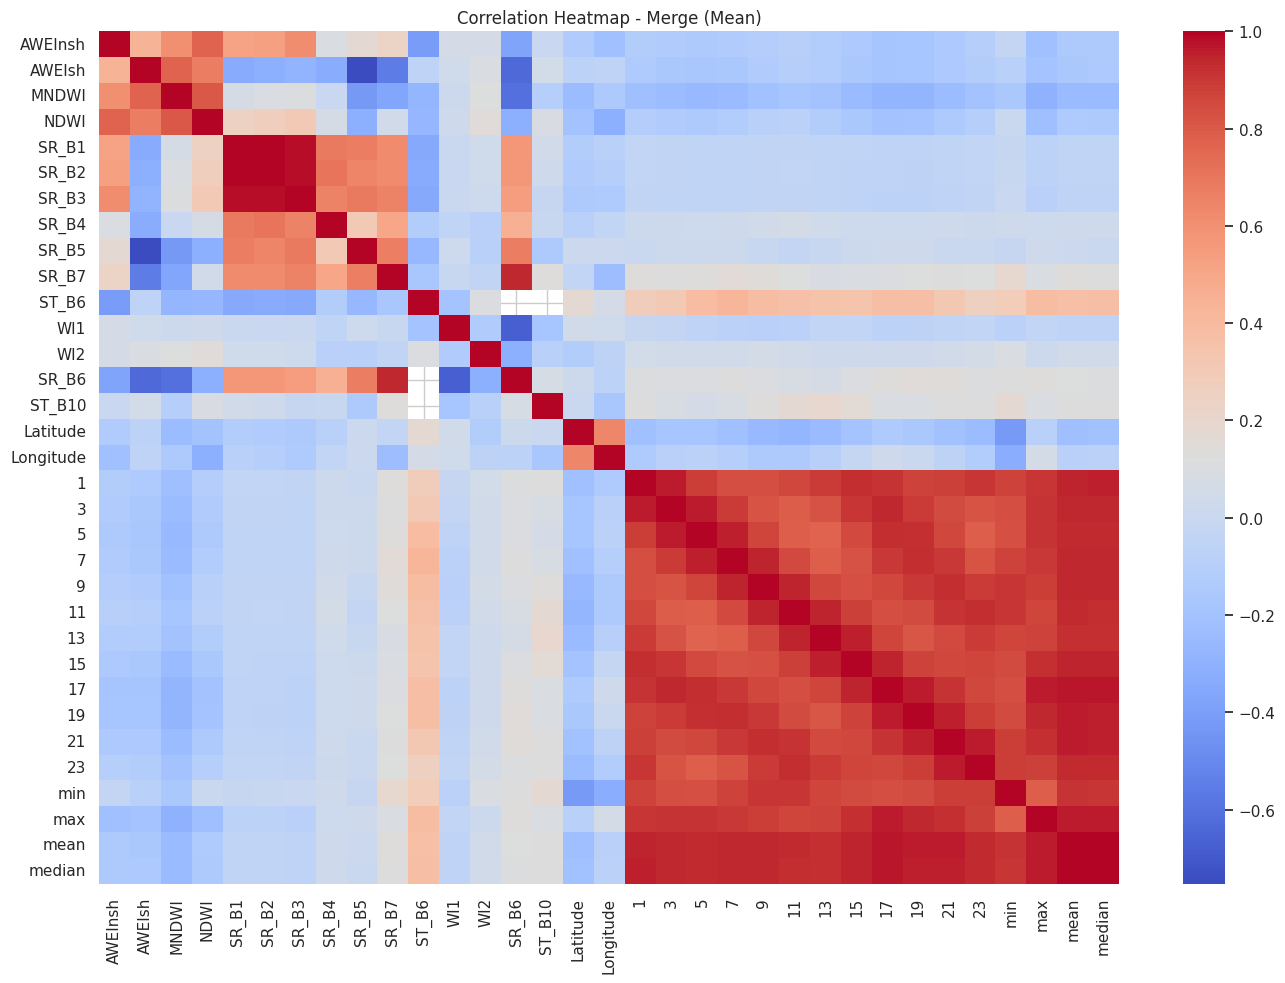

In [138]:
# Plot correlation heatmap for MEAN
plt.figure(figsize=(14, 10))
sns.heatmap(merge_mean_corr , cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap - Merge (Mean)')
plt.tight_layout()
plt.show()

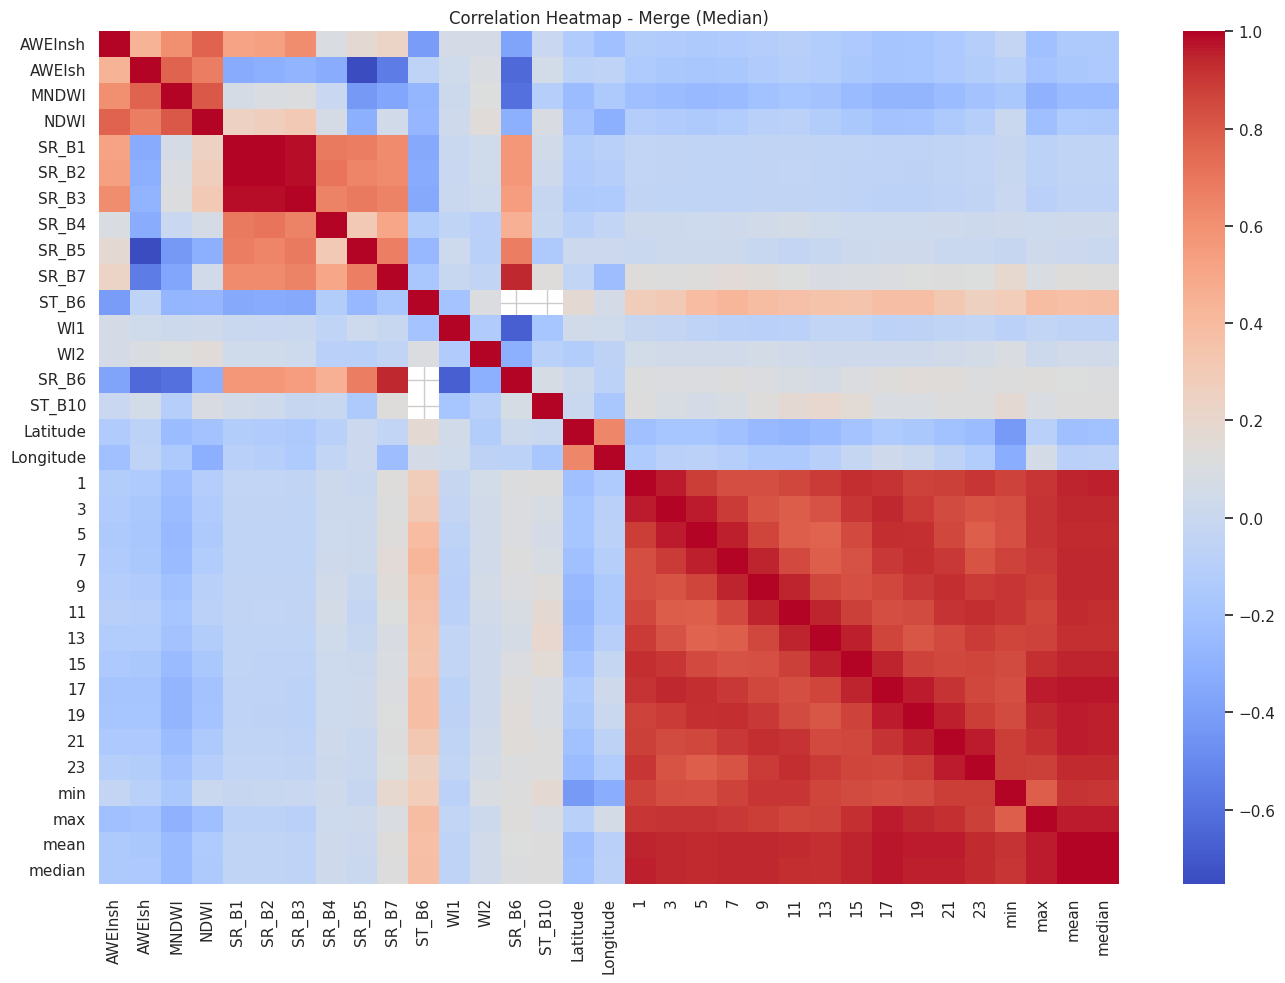

In [139]:
# Plot correlation heatmap for MEAN
plt.figure(figsize=(14, 10))
sns.heatmap(merge_mean_corr , cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap - Merge (Median)')
plt.tight_layout()
plt.show()